In [142]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
netflix_db = pd.read_csv("./NetflixUserbase.csv")
# Verificando algumas informações básicas do dataset
columns = netflix_db.columns
print(netflix_db.isnull().sum())
netflix_db.info()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            70 non-null     int64 
 1   Subscription Type  70 non-null     object
 2   Monthly Revenue    70 non-null     int64 
 3   Join Date          70 non-null     object
 4   Last Payment Date  70 non-null     object
 5   Country            70 non-null     object
 6   Age                70 non-null     int64 
 7   Gender             70 non-null     object
 8   Device             70 non-null     object
 9   Plan Duration      70 non-null     object
dtypes: int64(3), object(7)
memory usage: 5.6+ KB


<Axes: xlabel='Country'>

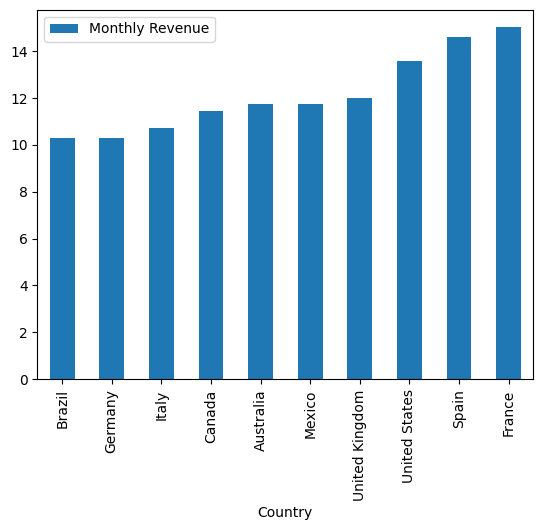

In [143]:
netflix_db.groupby('Country')[['Monthly Revenue']].mean().sort_values('Monthly Revenue').plot(kind='bar')

#Aqui é possivel observar a média da receita mensal separada por países onde é possivel observar que a França possui a receita mensal maior e o Brasil a menor

In [144]:
#Aqui é possível observar que a média e a mediana da idade são bem próximas (36)
print(netflix_db['Age'].mean(), netflix_db['Age'].median())
#É possível observar que o dataset trás indivíduos com idades entre 26 e 51 anos
print(netflix_db['Age'].min()) 
print(netflix_db['Age'].max())
#A itália possui a maior idade média enquanto os estados unidos poussi a menor
print(netflix_db.groupby('Country')['Age'].mean().sort_values())

36.6 36.0
26
51
Country
United States     28.857143
Spain             31.857143
Australia         32.142857
France            32.571429
Mexico            35.142857
Canada            37.857143
Germany           38.857143
United Kingdom    42.571429
Brazil            42.857143
Italy             43.285714
Name: Age, dtype: float64


In [145]:
#Tipos de assinaturas
print(netflix_db['Subscription Type'].unique())
print(netflix_db.query('`Subscription Type` == "Basic"').shape)
print(netflix_db.query('`Subscription Type` == "Premium"').shape)
print(netflix_db.query('`Subscription Type` == "Standard"').shape)
#O tipo de assinatura preferida é a Básica

['Basic' 'Premium' 'Standard']
(27, 10)
(21, 10)
(22, 10)


In [146]:
#Normalização dos dados
diabetes = pd.read_csv("./diabetes_012_health_indicators_BRFSS2015.csv")
print(diabetes.columns)
print(diabetes)
print(f"Maximo {max(diabetes['BMI'])}")
print(f"Maximo {min(diabetes['BMI'])}")
print(f"Media {diabetes['BMI'].mean()}")
print(f"Mediana {diabetes['BMI'].median()}")
print(diabetes['MentHlth'])
print(diabetes['PhysHlth'])
#diabetes.info()

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0   

In [147]:
x = diabetes[['BMI', 'Smoker', 'PhysActivity', 'Age']]
y = diabetes['Diabetes_012']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8394302533375381


c:\Users\vh_co\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
diabetes['BMI'] = (diabetes ['BMI'] - min(diabetes['BMI']))/(max(diabetes['BMI']) -min(diabetes['BMI']))
#diabetes['Age'] = (diabetes ['Age'] - min(diabetes['Age']))/(max(diabetes['Age']) -min(diabetes['Age']))
print(f"Maximo {max(diabetes['BMI'])}")
print(f"Maximo {min(diabetes['BMI'])}")
print(f"Media {diabetes['BMI'].mean()}")
print(f"Mediana {diabetes['BMI'].median()}")


Maximo 1.0
Maximo 0.0
Media 0.19049260008947363
Mediana 0.1744186046511628


In [149]:
x = diabetes[['BMI', 'Smoker', 'PhysActivity', 'Age']]
y = diabetes['Diabetes_012']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8391411752338904


c:\Users\vh_co\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:
#Redução da dimensionalidade dos dados - PCA
#Normalizando todos os dados do dataset
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(diabetes)
pca = PCA(n_components=3) #Definindo número de componentes
dados_pca = pca.fit_transform(dados_normalizados)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(dados_pca)

[[ 0.23576188  0.49408129  0.42161491  0.02497492  0.03072183  0.28888783
   0.06833099  0.16458542 -0.27366749 -0.18706411 -0.14264425 -0.00394996
  -0.00228817  0.05535814  0.2415446   0.09379067  0.20061839  0.30778378
   0.05893556  0.15093945 -0.09934328 -0.18492091]
 [-0.07162643 -0.19160857 -0.19228718 -0.03173301 -0.00087345  0.32354738
  -0.01907585 -0.01483515 -0.04388721 -0.55798582 -0.23665164  0.03300183
  -0.02881995 -0.00434549 -0.03832716 -0.02099626 -0.06101063 -0.11896522
   0.64083419 -0.09927693 -0.01553026  0.05603195]
 [-0.04042859 -0.28961626 -0.37531413 -0.02614526  0.00462588 -0.01531021
   0.00632993 -0.05533321 -0.35695646 -0.36722902 -0.21060123 -0.00243465
  -0.04561847  0.10533538  0.10073479  0.12133624  0.143119    0.20246506
  -0.56024257 -0.09238604 -0.07852287 -0.18670216]]
[0.17989983 0.10919673 0.1018829 ]
[[ 1.54409944 -0.15520816  0.75207631]
 [-0.07246511  0.65353922  1.08717758]
 [ 1.26762988 -0.80273934  0.70301372]
 ...
 [-0.7702342  -0.212965

In [184]:
#Sem a normalização dos dados
diabetes = pd.read_csv("./diabetes_012_health_indicators_BRFSS2015.csv")
x = diabetes[['BMI', 'Smoker', 'PhysActivity', 'Age']]
y = diabetes['Diabetes_012']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.8396404919583728


In [185]:
#Com normalização
diabetes = pd.read_csv("./diabetes_012_health_indicators_BRFSS2015.csv")
diabetes = diabetes[['Diabetes_012','BMI', 'Smoker', 'PhysActivity', 'Age']]
diabetes['BMI'] = (diabetes ['BMI'] - min(diabetes['BMI']))/(max(diabetes['BMI']) -min(diabetes['BMI']))
diabetes['Age'] = (diabetes ['Age'] - min(diabetes['Age']))/(max(diabetes['Age']) -min(diabetes['Age']))
diabetes['PhysActivity'] = (diabetes ['PhysActivity'] - min(diabetes['PhysActivity']))/(max(diabetes['PhysActivity']) -min(diabetes['PhysActivity']))
x = diabetes[['BMI', 'Smoker', 'PhysActivity', 'Age']]
y = diabetes['Diabetes_012']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)


Acurácia:  0.8404814464417113
